# NEURONによる神経シミュレーション

PCにPythonをインストールして行ことも出来ますが、設定が煩雑であるため難しいです。

そこで、GoogleColabを使用すればGoogleアカウントがあれば遠隔でまた無料で使用可能です。12時間まで連続使用来ます。

順番に Shift + Enter を押していくだけで、シミュレーションが可能です。

参考資料

１．NEURONのPythonチュートリアル https://neuron.yale.edu/neuron/docs/scripting-neuron-basics

２．井本研究室のホームページ https://www.nips.ac.jp/huinfo/documents/index.htm

３．NEURON+Pythonによるはじめての神経細胞シミュレーション　https://qiita.com/DaisukeMiyamoto/items/69821c254cebc3de2879

## NEURONのインストール

In [1]:
!pip install neuron

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 44.1 MB/s eta 0:00:00


これで、GoogleColab上でNEURONが使えるようになりました。(制限時間12時間)

次からは、デモを行います。


## デモ１　パッチクランプ法のシミュレーション

In [2]:
from neuron import h
import neuron
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 神経細胞の設定
soma = h.Section()
soma.diam = 30.0 # 細胞の直径(micron)
soma.L = 30.0 # 細胞の長さ(micron)
soma.insert('hh')  # ホジキン・ハックスレーモデルに切り替え

# Current Clampの設定
ic = h.IClamp(0.5, sec=soma) # Current Clampを設定。0.5はsomaにおける位置(0～1)
ic.delay = 20.0   # 開始時間(ms)
ic.dur   = 100.0  # 持続時間(ms)
ic.amp   = 0.6     # 固定電流(nA)

# 微分方程式の数値計算の設定
cvode = h.CVode()
cvode.active(1)
cvode.atol(1.0e-5)

1e-05

In [4]:
# 記録変数の設定
vv = h.Vector()      # membrane potential vector
tv = h.Vector()      # time stamp vector
cv = h.Vector()      # current size
vv.record(soma(0.5)._ref_v) # 0.5はsomaにおける位置(0～1)
tv.record(h._ref_t)
cv.record(ic._ref_i)

Vector[2]

In [5]:
# シミュレーション実行
tstop = 200.0 # 総時間(ms)
v_init = -65.0 # 初期の膜電位(mV)
h.finitialize(v_init)
h.fcurrent()
neuron.run(tstop)

<ipython-input-5-a4c5f77574dc>:6: DeprecationWarning: neuron.run(tstop) is deprecated; use h.stdinit() and h.continuerun(tstop) instead
  neuron.run(tstop)


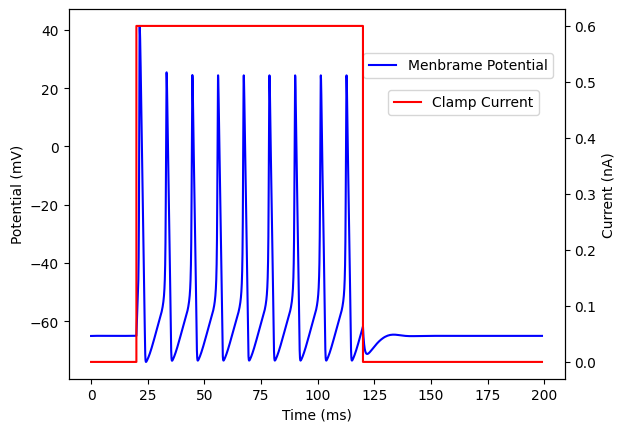

In [6]:
# プロット作成
ax1 = plt.subplot()
ax2 = ax1.twinx()
ax1.plot(tv.as_numpy(), vv.as_numpy(), color="blue", label= "Menbrame Potential")
ax1.set_ylabel('Potential (mV)')
ax2.plot(tv.as_numpy(), cv.as_numpy(), color="red", label= "Clamp Current")
ax2.set_ylabel('Current (nA)')
ax1.legend(bbox_to_anchor=(0.58, 0.9))
ax2.legend(bbox_to_anchor=(0.63, 0.8))
ax1.set_xlabel('Time (ms)')
plt.show()

## デモ２　樹状突起の刺激から細胞体が発火するシミュレーション

In [7]:
from neuron import h
import neuron
import numpy as np
import matplotlib.pyplot as plt
# 細胞体一つに4つの樹状突起をつける
soma = h.Section(name='soma')
dend1 = h.Section(name='dend1')
dend2 = h.Section(name='dend2')
dend3 = h.Section(name='dend3')
dend4 = h.Section(name='dend4')

パラメータを変えて再度試す場合はこれ以降のコードを再実行する。（上のコードは実行しない。）

In [8]:
# 樹状突起を細胞体の0.1に配置(0～1で位置を指定する)
dend1.connect(soma(0.1))
dend2.connect(soma(0.1))
dend3.connect(soma(0.1))
dend4.connect(soma(0.1))
# 長さと直径の設定
soma.L = 12.6157 # 細胞体の長さ（micron）
soma.diam = 12.6157 # 細胞体の直径（micron）
dend1.L = 200 # 樹状突起１の長さ（micron）
dend2.L = 200 # 樹状突起２の長さ（micron）
dend3.L = 200 # 樹状突起３の長さ（micron）
dend4.L = 200 # 樹状突起４の長さ（micron）
dend1.diam = 1.0 # 樹状突起１の直径（micron）
dend2.diam = 1.0 # 樹状突起２の直径（micron）
dend3.diam = 1.0 # 樹状突起３の直径（micron）
dend4.diam = 1.0 # 樹状突起４の直径（micron）
# 計算モデルの設定
soma.insert('hh')
dend1.insert('pas')
dend2.insert('pas')
dend3.insert('pas')
dend4.insert('pas')

dend4

In [9]:
h.topology()


|-|       soma(0-1)
  `|       dend1(0-1)
  `|       dend2(0-1)
  `|       dend3(0-1)
  `|       dend4(0-1)



1.0

<Axis3DWithNEURON: >

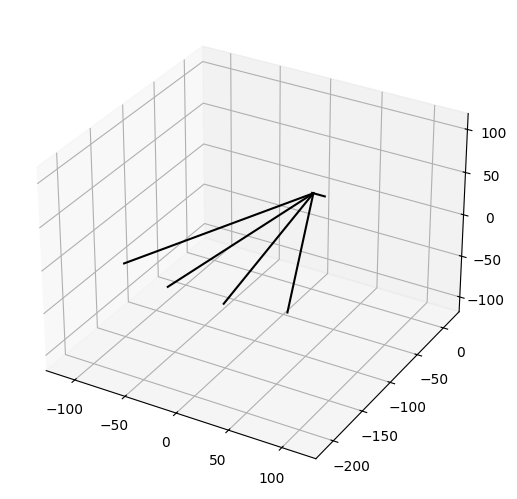

In [10]:
# 細胞の形の三次元表示
h.PlotShape(False).plot(plt)

In [11]:
# 刺激条件を設定
# 30msおきに5回刺激
stim = h.NetStim()
stim.number = 5
stim.interval = 30 # ms
stim.start = 3 # ms
# 刺激場所や刺激の強さをバラバラにした
syn1 = h.ExpSyn(dend1(0.9))
ncstim1 = h.NetCon(stim, syn1)
ncstim1.delay = 0.6
ncstim1.weight[0] = 0.02
syn2 = h.ExpSyn(dend2(0.8))
ncstim2 = h.NetCon(stim, syn2)
ncstim2.delay = 0.5
ncstim2.weight[0] = 0.025
syn3 = h.ExpSyn(dend3(1.0))
ncstim3 = h.NetCon(stim, syn3)
ncstim3.delay = 0.2
ncstim3.weight[0] = 0.01
syn4 = h.ExpSyn(dend4(0.6))
ncstim4 = h.NetCon(stim, syn4)
ncstim4.delay = 0.3
ncstim4.weight[0] = 0.015
syn1.tau = syn2.tau = syn3.tau = syn4.tau = 0.3 # 時定数

In [12]:
# 微分方程式の数値計算の設定
cvode = h.CVode()
cvode.active(1)
cvode.atol(1.0e-5)
# 記録変数の設定
soma_v = h.Vector().record(soma(0.5)._ref_v)
dend1_v = h.Vector().record(dend1(0.5)._ref_v)
dend2_v = h.Vector().record(dend2(0.5)._ref_v)
dend3_v = h.Vector().record(dend3(0.5)._ref_v)
dend4_v = h.Vector().record(dend4(0.5)._ref_v)
t = h.Vector().record(h._ref_t)

In [13]:
# シミュレーション実行
tstop = 200.0 # 総時間(ms)
v_init = -65.0 # 初期の膜電位(mV)
h.finitialize(v_init)
h.fcurrent()
neuron.run(tstop)

<ipython-input-13-a4c5f77574dc>:6: DeprecationWarning: neuron.run(tstop) is deprecated; use h.stdinit() and h.continuerun(tstop) instead
  neuron.run(tstop)


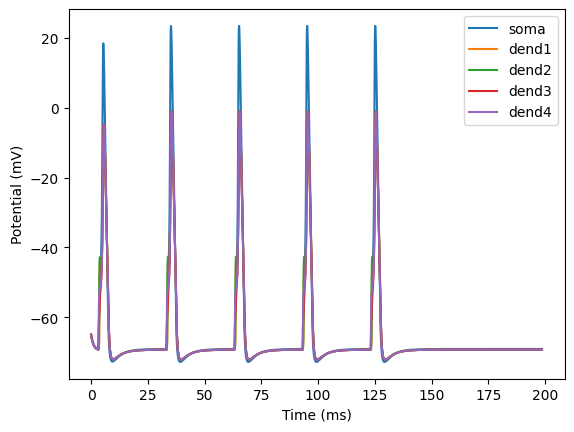

In [14]:
# プロット
plt.plot(t, soma_v, label='soma')
plt.plot(t, dend1_v, label='dend1')
plt.plot(t, dend2_v, label='dend2')
plt.plot(t, dend3_v, label='dend3')
plt.plot(t, dend4_v, label='dend4')
plt.legend()
plt.ylabel('Potential (mV)')
plt.xlabel('Time (ms)')
plt.show()

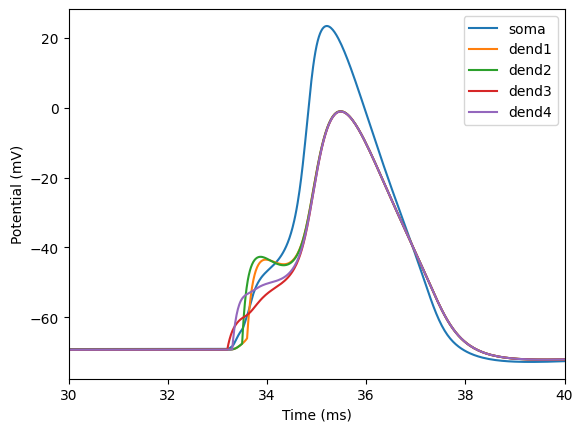

In [15]:
# 活動電位の一回をプロット
plt.plot(t, soma_v, label='soma')
plt.plot(t, dend1_v, label='dend1')
plt.plot(t, dend2_v, label='dend2')
plt.plot(t, dend3_v, label='dend3')
plt.plot(t, dend4_v, label='dend4')
plt.legend()
plt.xlim([30, 40]);
plt.ylabel('Potential (mV)')
plt.xlabel('Time (ms)')
plt.show()

まず各樹状突起に電圧が上がって、それが細胞体に達すると活動電位が発生しました。
その後に活動電位によって樹状突起の電位も上がりました。